Breast Cancer SVM Analysis
*Exploratory Data Analysis and first experiments with the Breast Cancer Wisconsin dataset*


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import os 


In [24]:
os.makedirs("outputs/plots", exist_ok=True)

In [13]:
from sklearn import datasets
bunch_data = datasets.load_breast_cancer()


In [ ]:
bunch_data.DESCR

_breast_cancer_dataset

Breast Cancer Wisconsin (Diagnostic) Dataset
--------------------------------------------

Data Set Characteristics:
- Number of Instances: 569
- Number of Attributes: 30 numeric, predictive attributes and the class

Attribute Information:
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

  The mean, standard error, and "worst" (largest mean of three worst values)
  of these features were computed for each image, resulting in 30 features.
  For instance:
  - Field 0 -> Mean Radius
  - Field 10 -> Radius SE
  - Field 20 -> Worst Radius

- class:
    - WDBC-Malignant
    - WDBC-Benign

Summary Statistics:

Feature                           Min       Max
------------------------------------------
radius (mean)                     6.981    28.11
texture (mean)                    9.71     39.28
perimeter (mean)                  43.79    188.5
area (mean)                       143.5    2501.0
smoothness (mean)                 0.053    0.163
compactness (mean)                0.019    0.345
concavity (mean)                  0.0      0.427
concave points (mean)             0.0      0.201
symmetry (mean)                   0.106    0.304
fractal dimension (mean)          0.05     0.097
radius (standard error)           0.112    2.873
texture (standard error)          0.36     4.885
perimeter (standard error)        0.757    21.98
area (standard error)             6.802    542.2
smoothness (standard error)       0.002    0.031
compactness (standard error)      0.002    0.135
concavity (standard error)        0.0      0.396
concave points (standard error)   0.0      0.053
symmetry (standard error)         0.008    0.079
fractal dimension (standard error)0.001    0.03
radius (worst)                    7.93     36.04
texture (worst)                   12.02    49.54
perimeter (worst)                 50.41    251.2
area (worst)                      185.2    4254.0
smoothness (worst)                0.071    0.223
compactness (worst)               0.027    1.058
concavity (worst)                 0.0      1.252
concave points (worst)            0.0      0.291
symmetry (worst)                  0.156    0.664
fractal dimension (worst)         0.055    0.208

Missing Attribute Values: None
Class Distribution: 212 - Malignant, 357 - Benign

Creator: Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian
Donor: Nick Street
Date: November 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle aspirate (FNA)
of a breast mass. They describe characteristics of the cell nuclei present
in the image.

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T)
[K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings
of the 4th Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear programming
to construct a decision tree. Relevant features were selected using an
exhaustive search in the space of 1-4 features and 1-3 separating planes.

The actual linear program used to obtain the separating plane in the
3-dimensional space is described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming
Discrimination of Two Linearly Inseparable Sets", Optimization Methods
and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

References:
- W.N. Street, W.H. Wolberg, O.L. Mangasarian. Nuclear feature extraction
  for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium
  on Electronic Imaging: Science and Technology, volume 1905, pages 861-870.
- O.L. Mangasarian, W.N. Street, W.H. Wolberg. Breast cancer diagnosis
  and prognosis via linear programming. Operations Research, 43(4),
  pages 570-577, July-August 1995.
- W.H. Wolberg, W.N. Street, O.L. Mangasarian. Machine learning techniques
  to diagnose breast cancer from fine-needle aspirates. Cancer Letters
  77 (1994) 163-171.




In [14]:
X, y = bunch_data.data, bunch_data.target

In [8]:
# Count occurrences of each class
(unique, counts) = np.unique(y, return_counts=True)
percentages = counts / counts.sum() * 100

for label, pct in zip(unique, percentages):
    print(f"Label {label}: {pct:.2f}%")

Label 0: 37.26%
Label 1: 62.74%


The Wisconsin Breast Cancer Dataset exhibits a slight class imbalance:

- Label 0 (benign): 37.26%  
- Label 1 (malignant): 62.74%  

As a result, **accuracy is not a reliable performance metric** in this context. A classifier that predicts only the majority class (Label 1) would already achieve around 62–63% accuracy without correctly identifying any samples from the minority class. Therefore, accuracy can give a misleading impression of model performance.  

Better alternatives are **Precision, Recall, F1-Score**, or **ROC-AUC**, which account for the performance on each class individually.


Since we have determined that accuracy is not appropriate, the next step is to select a more informative metric that properly reflects the model's ability to distinguish between the classes.

# Choosing a Performance Metric for the Wisconsin Breast Cancer Dataset

Since we know that accuracy can be misleading due to the class imbalance in this dataset (Label 0: 37.26%, Label 1: 62.74%), we need to focus on metrics that allow us to properly assess how well our model can classify both classes.  

## Candidate Performance Metrics

| Metric | What it measures | Why it’s useful for us |
|--------|----------------|------------------------|
| **Precision** | Fraction of predicted positives that are correct | Helps us understand how reliable our positive predictions are (e.g., predicting “malignant”) |
| **Recall (Sensitivity)** | Fraction of actual positives that are correctly predicted | Ensures that we detect as many malignant tumors as possible (minimizing false negatives) |
| **F1-Score** | Harmonic mean of Precision and Recall | Balances Precision and Recall; useful when both false positives and false negatives matter for our evaluation |
| **ROC-AUC** | Area under the Receiver Operating Characteristic curve | Measures our model’s ability to discriminate between classes across all thresholds; robust to class imbalance |

## Our Recommended Approach

1. We will start by examining the **F1-Score for the minority class**. This allows us to ensure that our model is not ignoring the less frequent class (Label 0). If the F1-Score is low for this class, it indicates that the model is biased toward the majority class and fails to correctly identify benign cases. This step is particularly important in medical datasets where missing a diagnosis could have serious consequences.  

2. When training models, such as **SGD classifiers**, and when analyzing **learning curves**, we will use **F1-Score or Recall as the primary performance metric** instead of accuracy.  
   - **Recall** is especially critical because we want to minimize false negatives (missing malignant cases).  
   - **F1-Score** provides a balanced measure that accounts for both false positives and false negatives, making it suitable for hyperparameter tuning and model comparison.  

3. We will also consider **ROC-AUC** as an overall metric for comparing models, since it evaluates the classifier’s ability to separate classes across all thresholds and is robust to class imbalance.  



In [10]:
df = pd.DataFrame(X, columns = bunch_data.feature_names)

df["target"] = y

In [11]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


All features are numeric

In [12]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

569 data points, every feature dtype float64, target dtype int64


In [13]:
# Descriptive statistics
describe = df.describe()
p01 = df.quantile(0.01)  # 1st percentile
p99 = df.quantile(0.99)  # 99th percentile

# Threshold for "significant" difference (10% of range)
threshold = 0.10  

outlier_columns = []

for col in df.columns:
    # Difference from min and max
    diff_min = p01[col] - df[col].min()
    diff_max = df[col].max() - p99[col]
    
    # Relative difference compared to the full range
    rel_diff_min = diff_min / (df[col].max() - df[col].min())
    rel_diff_max = diff_max / (df[col].max() - df[col].min())
    
    # Flag columns where the difference is significant
    if rel_diff_min > threshold or rel_diff_max > threshold:
        outlier_columns.append(col)

non_outlier_columns = [col for col in df.columns if col not in outlier_columns]
print("Columns that likely contain outliers:", outlier_columns)
print("Columns without significant outliers:", non_outlier_columns)



Columns that likely contain outliers: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst symmetry', 'worst fractal dimension']
Columns without significant outliers: ['worst concave points', 'target']


Most columns contain significant outliers; therefore, feature scaling is essential, especially when using SVM.

In [14]:
df.isna().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


The dataset contains no missing values in any feature, ensuring data completeness. This allows for direct modeling without the need for imputation or missing value handling.

The Freedman-Diaconis rule is a statistical method used to determine the optimal bin width (\(h\)) for a histogram, designed to minimize the difference between the empirical histogram and the underlying probability density function. It is highly robust to outliers and skewed data because it uses the interquartile range (IQR) rather than the standard deviation. 

Formula 
The bin width \(h\) is calculated as:
$$
\text{Bin Width} = 2 \times \frac{\mathrm{IQR}(x)}{\sqrt[3]{n}}
$$

Where: IQR(x) is the Interquartile Range of the data $75^{th}-25^{th}$ percentile.
n is the total number of observations in the sample. 

Key Characteristics Robustness: 
Because it relies on the IQR, this rule is less sensitive to extreme outliers than rules based on data range or standard deviation.

Optimal Density: It is designed to minimize the integrated mean squared error of the density estimate.Application: It is particularly effective for large datasets or data with heavy-tailed distributions.Implementation: It is often implemented in statistical software (e.g., nclass.FD in R, 'fd' in MATLAB histcounts, numpy.histogram_bin_edges(data, bins='fd')). 

Comparison
While simpler rules like Sturges' rule (best for normal distributions) or Scott's rule exist, the Freedman-Diaconis rule generally provides a better balance for non-normal or skewed data by adapting to the scale of the data. 

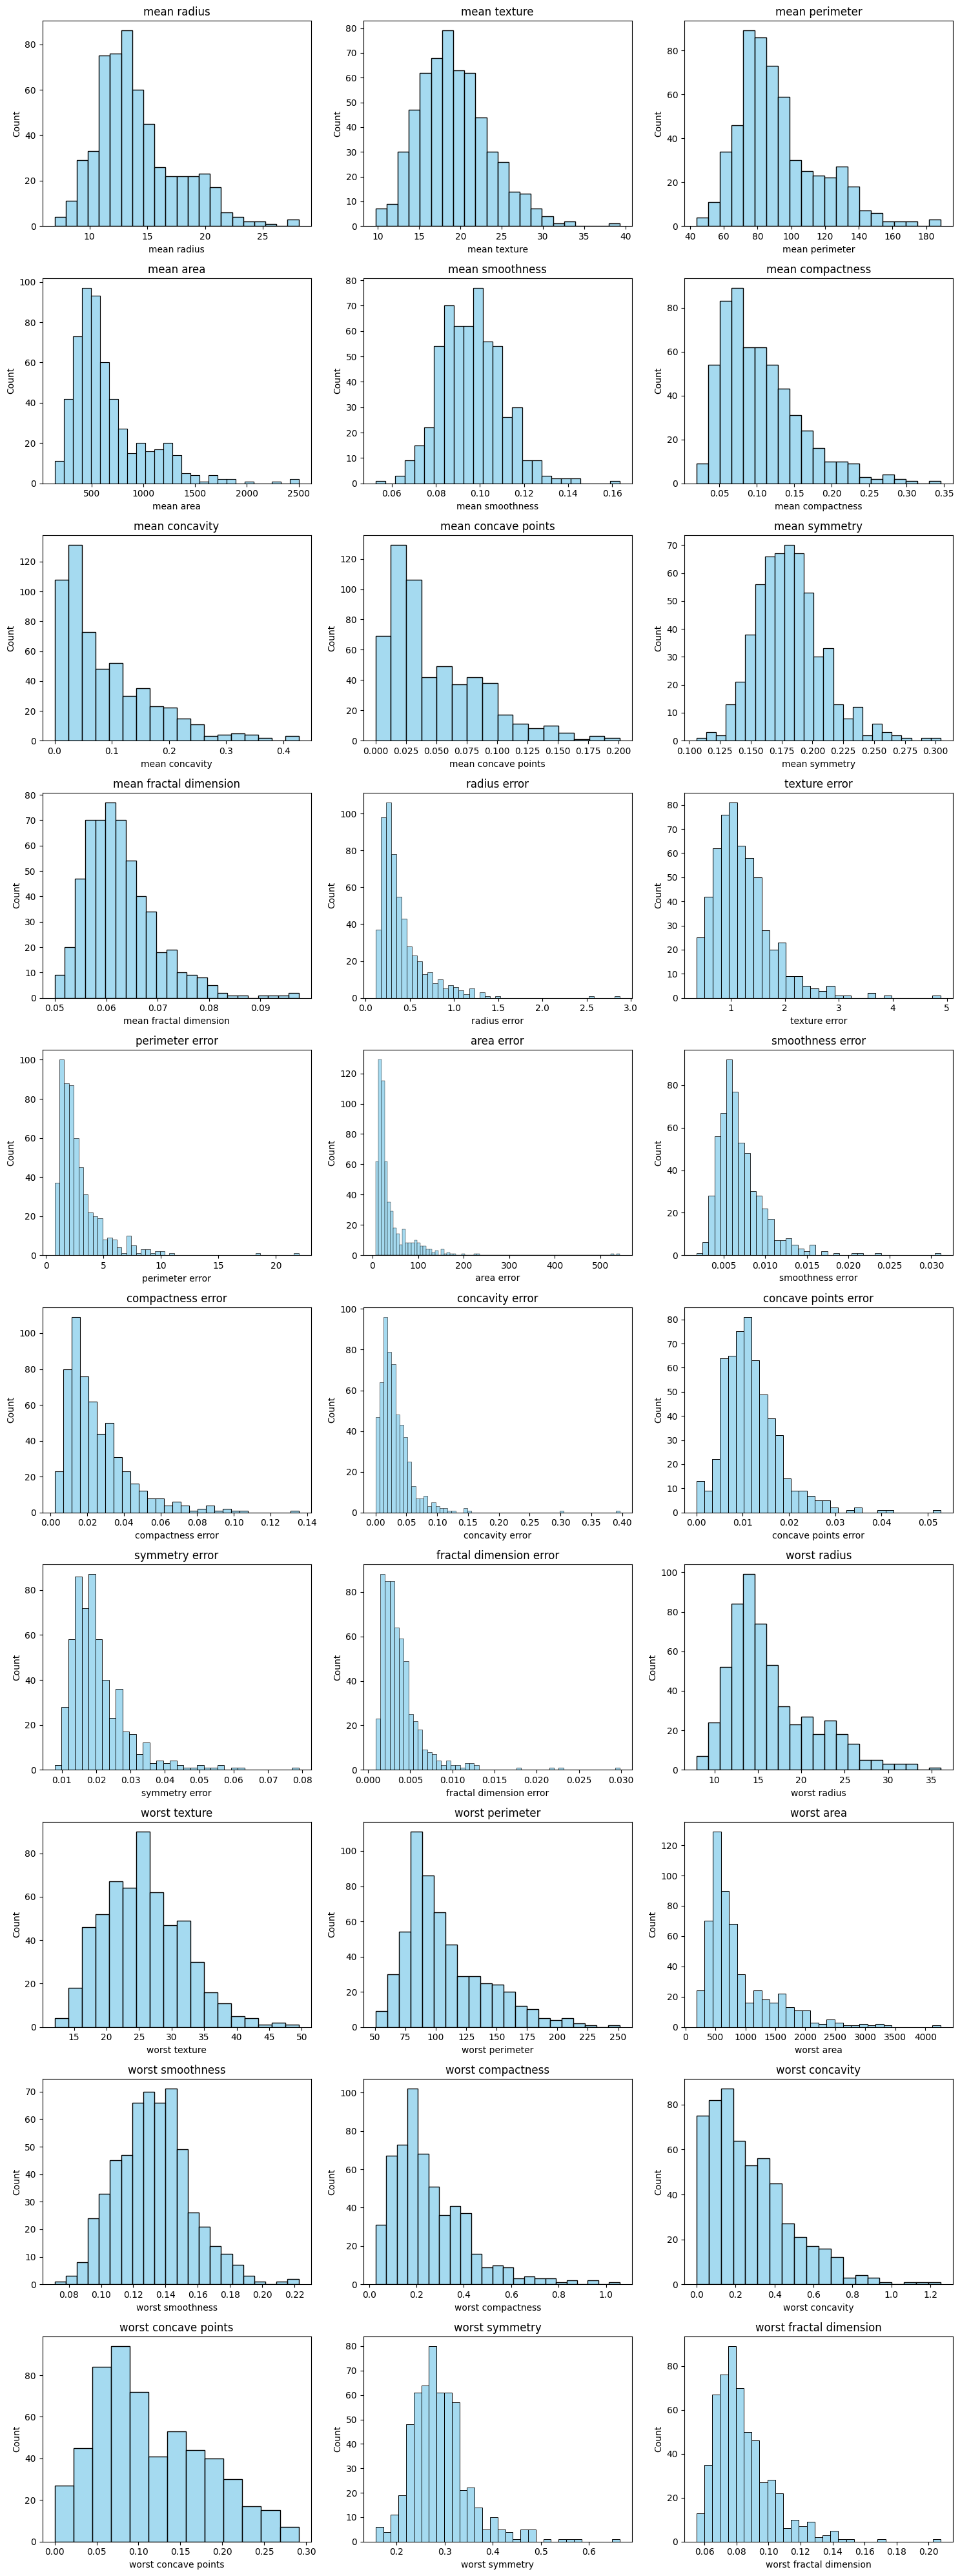

In [15]:
import math

def freedman_diaconis_bins(x):
    """Returns the number of bins according to the Freedman-Diaconis rule."""
    x = np.asarray(x)
    q75, q25 = np.percentile(x, [75 ,25])
    iqr = q75 - q25
    n = len(x)
    bin_width = 2 * iqr / (n ** (1/3))
    if bin_width == 0:  # if all values are equal
        return 1
    return int(np.ceil((x.max() - x.min()) / bin_width))

df_without_target = df.drop(["target"], axis = 1)
n_cols = len(df_without_target.columns)
cols_per_row = 3  # number of plots per row
rows = math.ceil(n_cols / cols_per_row)

fig, axes = plt.subplots(rows, cols_per_row, figsize=(5*cols_per_row, 4*rows))
axes = axes.flatten()  # flatten in case of multiple rows

for i, col in enumerate(df_without_target.columns):
    bins = freedman_diaconis_bins(df[col])
    sns.histplot(df[col], ax=axes[i], bins=bins, color='skyblue')
    axes[i].set_title(col, fontsize=12)
    axes[i].tick_params(axis='both', labelsize=10)

# Hide any unused axes if n_cols < rows*cols_per_row
for j in range(n_cols, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


Right-Skewed Features and Implications for SVM

Through histogram analysis, the following features were identified as **right-skewed**:

- mean area, mean compactness, mean concavity, mean concave points, mean fractal dimension  
- radius error, texture error, perimeter error, area error, smoothness error, compactness error, concavity error, concave points error, symmetry error, fractal dimension error  
- worst radius, worst perimeter, worst area, worst compactness, worst concavity, worst symmetry, worst fractal dimension

**Implications for SVM:**

- SVMs are **sensitive to the scale of features** but generally robust to skewness in the distribution.  
- Right-skewed distributions can result in a few very large values, which may **dominate the distance metric** used by SVM.  
- **Standard scaling (StandardScaler)** is usually sufficient, as it centers the data and normalizes variance.  
- **Optional:** For extremely skewed features, a **log or power transformation** can reduce skewness and may improve model stability, though it is not strictly necessary for SVM.  
- Overall, scaling all features ensures that right-skewed features do not disproportionately affect the SVM decision boundary.


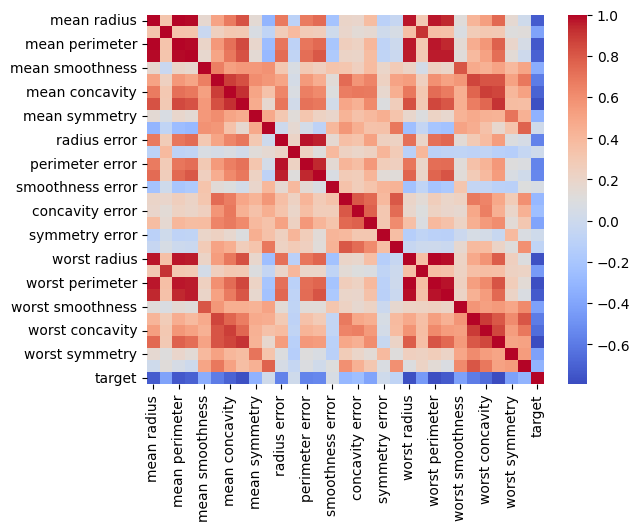

In [16]:
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.show()

In [17]:
## Feature Correlation with Target
corr_matrix = df.corr()
corr_matrix["target"].sort_values(ascending = False)

,target
target,1.000000
smoothness error,0.067016
mean fractal dimension,0.012838
texture error,0.008303
symmetry error,0.006522
fractal dimension error,-0.077972
concavity error,-0.253730
compactness error,-0.292999
worst fractal dimension,-0.323872
mean symmetry,-0.330499


- Features with strong negative correlation (|r| > 0.7), such as 'worst concave points', 'worst perimeter', and 'mean concave points', are the most predictive for the target.  
- Features with weak correlations (|r| < 0.1), such as 'smoothness error' or 'mean fractal dimension', contribute little individually.  
- This suggests that SVM models should focus on the highly correlated features, though all features can be used since SVMs are robust to multicollinearity.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



We will begin by training a Linear Support Vector Machine (LinearSVC) model using the **default regularization parameter** (`C=1.0`). Since LinearSVC always applies regularization internally, we cannot completely disable it. Starting with the standard setting allows us to establish a **baseline model** and observe the model’s realistic behavior on the dataset.  

Once the model is trained, we will analyze the **learning curve** and evaluate the **F1-score for the minority class** to assess whether the model exhibits signs of underfitting or overfitting. Based on this analysis, we may consider **increasing `C`** to reduce the effect of regularization if the model is underfitting, or adjust other hyperparameters to improve generalization performance.


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

model = make_pipeline(
    StandardScaler(),
    LinearSVC(max_iter=20000, random_state=42)
)


For the learning curve analysis, we will use **F1-macro** as our scoring metric.  
This metric calculates the F1-score for each class independently and then averages them, giving both classes equal importance regardless of their frequency.  

Since our dataset is slightly imbalanced, this approach prevents the majority class from dominating the evaluation.  
Alternatively, we can also analyze the learning curve with **Recall-macro** if we want to focus more on minimizing false negatives, which is critical in medical applications such as cancer detection.

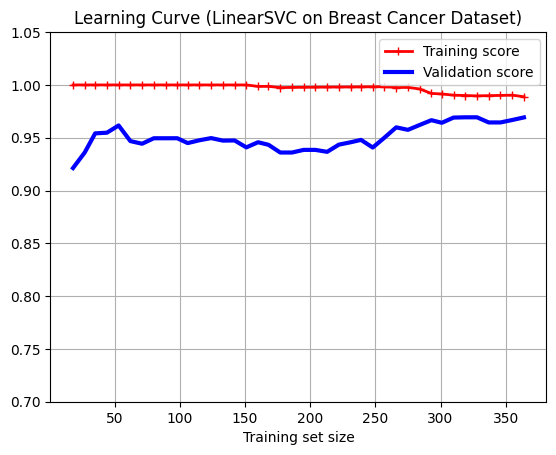

In [48]:
import sys
sys.path.append("..")

from src.utils.visualize import learning_curve_plot

learning_curve_plot(model, X_train, y_train)

# Learning Curve Analysis — LinearSVC (F1-Macro Scoring)

## Overview
The learning curve illustrates the evolution of the **F1-Macro score** for both training and cross-validation sets as the training size increases. The training performance remains consistently high, while the validation performance steadily improves before stabilizing at a comparably strong level.  

This pattern provides valuable insight into the **bias–variance characteristics** and **generalization capability** of the model.

---

## Key Observations

### 1️⃣ Training Performance
- The **training F1-Macro scores** start at **1.00** and remain effectively perfect across most training sizes, with only a marginal decline to approximately **0.99** at the largest training subsets.  
- Such near-perfect training performance indicates that the LinearSVC fits the training data almost completely, suggesting **low bias** and a model that captures the decision boundary very precisely.

### 2️⃣ Validation Performance
- The **validation F1-Macro scores** begin around **0.92–0.94** for smaller training subsets.  
- As the number of training samples increases, the validation score gradually improves, reaching **≈0.97** at full training size.  
- This steady increase demonstrates that the model **benefits from additional data**, reducing variance and improving its ability to generalize.

### 3️⃣ Training–Validation Gap
- There is a clear but moderate gap between the training (**≈1.00**) and validation (**≈0.97**) performance.  
- The gap **narrows** as training size grows, a classical sign of **decreasing variance**.  
- The persistence of a small residual gap at the end reflects a **minor overfitting tendency**, which is typical for high-dimensional linear classifiers on moderately sized datasets.

---

## Interpretation
Overall, the learning curve displays an **excellent generalization profile**:

- The model demonstrates consistently high F1-Macro scores, reflecting strong and balanced classification performance for both        malignant and benign cases. 
- It generalizes well without severe overfitting, thanks to the linear decision boundary and stratified cross-validation.  
- The **asymptotic flattening** of the validation curve suggests that additional training data would yield only marginal further improvements.  

In short, the LinearSVC achieves a **stable, high-performing regime** once trained on a sufficiently large portion of the dataset. The results indicate that the **feature set is informative** and that the chosen **regularization is appropriate** for this problem.

---

## Conclusion

| Aspect | Assessment | Comment |
|--------|------------|---------|
| **Bias** | Low | Training scores near perfection show that the model fits well. |
| **Variance** | Moderate but controlled | Slight gap between curves, shrinking with more data. |
| **Generalization** | Excellent | Validation F1 ≈ 0.97 is very strong and consistent. |
| **Need for more data** | Low | Curves plateau — model has learned the underlying patterns. |
| **Overall judgment** | ✅ Well-balanced and reliable classifier | Performs robustly with strong precision–recall trade-offs. |


# 1️⃣ Check for Model Improvements

Even though the learning curve demonstrates very strong performance, it is worth considering potential improvements:

- **Reduce the small overfitting gap:**  
  The training F1-Macro scores are slightly higher than the validation scores. This suggests a minor overfitting tendency. One approach is to **tune the regularization parameter `C`** in `LinearSVC`. Lowering `C` increases regularization, which can slightly improve validation stability and reduce overfitting.

- **Improve generalization further:**  
  While the model generalizes well, it is possible to explore additional strategies to enhance performance, such as feature selection, dimensionality reduction, or experimenting with different classifier architectures.


In [8]:
regularized_model = model = make_pipeline(
    StandardScaler(),
    LinearSVC(max_iter=20000, C = 0.9, random_state=42)
)

In [45]:
os.getcwd()

'c:\\Users\\tobia\\OneDrive\\Desktop\\PythonProjects\\breast_cancer_diagnosis_project'

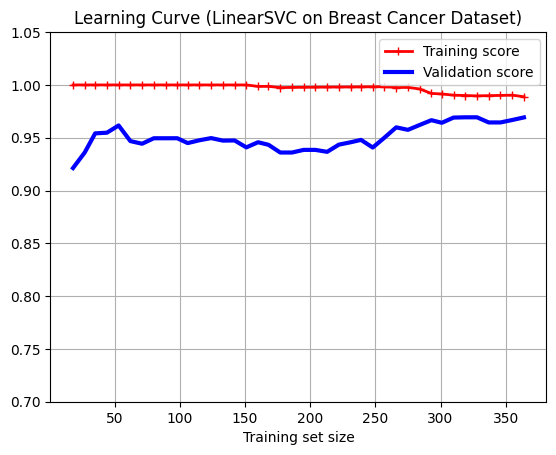

In [47]:
import sys
sys.path.append("..")

from src.utils.visualize import learning_curve_plot

learning_curve_plot(regularized_model, X_train, y_train)